# Plotting heuristics of Machine Learning pipeline

**Author**: Miguel Xochicale [@mxochicale](https://github.com/mxochicale)     
**Contributors**: Nhat Phung Tran Huy [@huynhatd13](https://github.com/huynhatd13); Hamideh Kerdegari [@hamidehkerdegari](https://github.com/hamidehkerdegari);  Alberto Gomez [@gomezalberto](https://github.com/)  


## History
* June2022: Adding multiple plots  
* Aug2022: Ploting multiple trains

## Summary
This notebook presents a learning pipeline to classify 4 chamber view from echocardiography datasets.

### How to run the notebook

1. Go to repository path: `cd $HOME/repositories/vital-ultrasound/ML4H2022`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server  
    Go to you repository path: `cd $HOME/repositories/vital-ultrasound/ML4H2022/notebooks/` and type in the pycharm terminal:
    ```
    conda activate echo-paper-ve 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
### References
* "Proposed Regulatory Framework for Modifications to Artificial Intelligence/Machine Learning (AI/ML)-Based Software as a Medical Device (SaMD) - Discussion Paper and Request for Feedback". https://www.fda.gov/media/122535/download 




# Jupyter Notebook

## 1. Setting imports and datasets paths

In [1]:
import os
import fnmatch
import sys
import argparse
import yaml
from pathlib import Path
import json    

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import numpy as np
import pandas as pd
import seaborn as sns

from typing import Dict, List, Tuple

# from source.helpers.learning_pipeline import json2DataFrame, \
#                                             jsonPARAMS2DataFrame


HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/vital-ultrasound/ML4H2022/'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH

# RESULTS_PATH='scripts/learning-pipeline/results/1st-tests-23-june-2022'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-01-02-03-04'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-04-05-06-07'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-09-10-11-12'


# ####################################
# ##MobileNetV1() with 3,208,450 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/mobileNetV1-8-aug-2022/'+NUMBER_OF_SUBJECTS

#######################################
##MobileNet2() with 2,225,858 params
# NUMBER_OF_SUBJECTS='05-subjects'
# # NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/5th-tests-04-augs-2022/'+NUMBER_OF_SUBJECTS


# ####################################
# ##SqueezeNet_source0() with 733,580 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/6th-tests-05-aug-2022/'+NUMBER_OF_SUBJECTS

####################################
##SqueezeNet_source0() with 733,580 params

# NUMBER_OF_SUBJECTS='05-subjects'
# # BATCHES='-batches_05'
# # BATCHES='-batches_10'
# BATCHES='-batches_30'

# NUMBER_OF_SUBJECTS='31-subjects'
# # BATCHES='-batches_05'
# # BATCHES='-batches_10'
# BATCHES='-batches_30'

# RESULTS_PATH='scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/'+ \
#         NUMBER_OF_SUBJECTS+BATCHES


# NUMBER_OF_SUBJECTS='05-subjects'
# BATCHES='-batches_30'
# LR='0_01'
# # LR='0_0001'
# # LR='0_00001'
# RESULTS_PATH='scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/learning_rate/'+ \
#         NUMBER_OF_SUBJECTS+BATCHES+'/lr_'+LR









########################################################################
########################################################################
########################################################################
##SqueezeNet_source0() with 733,580 params
##BATCH SIZE 
DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/batches'


#### 
BatchClips=4
TRAIN_VARIABLE_PATH='05-subjects-batches_04'

NUMBER_OF_SUBJECTS='05-subjects'
FRAMES_PER_SEGMENT_IN_A_CLIP = 1
LR=0.001
N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'



# #### 
# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=5
# LR=0.001
# TRAIN_VARIABLE_PATH='05-subjects-batches_05'



# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=10
# LR=0.001
# RESULTS_PATH='notebooks/heuristics_of_DLML_pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_10/'


# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=30
# LR=0.001
# RESULTS_PATH='notebooks/heuristics_of_DLML_pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_30/'


# # N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=40
# LR=0.001
# RESULTS_PATH='notebooks/heuristics_of_DLML_pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_40/'


# # N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=50
# LR=0.001
# RESULTS_PATH='notebooks/heuristics_of_DLML_pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_50/'


# # N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# NUMBER_OF_SUBJECTS='05-subjects'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=60
# LR=0.001
# RESULTS_PATH='notebooks/heuristics_of_DLML_pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_60/'




########################################################################
########################################################################
########################################################################
##SqueezeNet_source0() with 733,580 params

###########################
#### FRAMES PER CLIP

# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_01___BATCH_SIZE_CLIPS_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 1
# BatchClips=30
# LR=0.001


# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_02___BATCH_SIZE_CLIPS_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 2
# BatchClips=30
# LR=0.001


# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_05___BATCH_SIZE_CLIPS_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 5
# BatchClips=30
# LR=0.001


# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_10___BATCH_SIZE_CLIPS_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 10
# BatchClips=30
# LR=0.001


# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_20___BATCH_SIZE_CLIPS_30'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 20
# BatchClips=30
# LR=0.001

# N_CLIPS_BATCHES='NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_30___BATCH_SIZE_CLIPS_60'
# FRAMES_PER_SEGMENT_IN_A_CLIP = 30
# BatchClips=60
# LR=0.001







###################
## LEARNING RATES
# # LR='0_01'
# # LR='0_0001'
# # LR='0_00001'
# LR='0_01'
# LR='0_0001'
# LR='0_00001'


# DATA_RESULTS_PATH='data/results/aug-09-2022_SqueezeNet_hyperparameters/batches'
# TRAIN_VARIABLE_PATH='05-subjects-batches_05'



#####################
##Ploting settings
TRAINING_CURVES_PATH = os.path.join(FULL_REPO_PATH, DATA_RESULTS_PATH, TRAIN_VARIABLE_PATH)
PLOTTING_RESULTS_PATH = TRAINING_CURVES_PATH + '/plotting_results/'
os.makedirs(PLOTTING_RESULTS_PATH, exist_ok=True)
DPI_val=200


## Printing Versions and paths
print(f'Pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
print(f'PLOTTING_RESULTS_PATH: {PLOTTING_RESULTS_PATH}' )

Pandas Version: 1.1.3
seaborn Version: 0.11.0
TRAINING_CURVES_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_04
PLOTTING_RESULTS_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_04/plotting_results/


In [2]:
## Defining methods

def json2DataFrame(PATH, FILENAME, TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips, LR, STR_VARIABLE_NAME,
                   RUN_VERSION):
    FULL_PATH_FILENAME = os.path.join(PATH, FILENAME)
    pd_read_json = pd.read_json(
        FULL_PATH_FILENAME,
        orient='columns',
        typ='series')

    Filtered_JSON_stats = pd_read_json[TYPE_str]
    DFDICT = pd.DataFrame.from_dict(Filtered_JSON_stats).reset_index().melt(id_vars=['index']).rename(
        columns={"index": "epochs"})
    DFDICT.insert(1, 'LR', 'lr' + str(LR), True)
    DFDICT.insert(2, 'N_BatchClips', 'bc' + str(BatchClips), True)
    DFDICT.insert(3, 'FRXClips', str(FRAMES_PER_SEGMENT_IN_A_CLIP), True)
    DFDICT.rename(columns={"variable": "datatype"}, inplace=True)
    DFDICT.rename(columns={"value": STR_VARIABLE_NAME}, inplace=True)
    DFDICT.insert(6, 'RUN_NN', str(RUN_VERSION), True)
    return DFDICT


def jsonPARAMS2DataFrame(PATH, FILENAME):
    FULL_PATH_FILENAME = os.path.join(PATH, FILENAME)
    pd_read_json = pd.read_json(
        FULL_PATH_FILENAME,
        orient='columns',
        typ='series')
    return pd_read_json


## 2. Reading dictionaries and filtering files

In [3]:
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
os.chdir(TRAINING_CURVES_PATH)

pattern = 'TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC*.json'
json_files=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH), key=lambda x: x[-6])  , pattern)
print(f'-------------------')
print(f'-----Stats')
for i in range(0,len(json_files)):
    print(i, json_files[i])
    
    
pattern_params = 'TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERS*.json'
json_files_params=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH), key=lambda x: x[-6])  , pattern_params)    
print(f'-------------------')
print(f'----Parameters')
for i in range(0,len(json_files_params)):
    print(i, json_files_params[i])    


RUN_VERSION=[json_files[0][-12:-5], json_files[1][-12:-5], json_files[2][-12:-5]]
print(f'-------------------')
print(f'----RUN_VERSION')
for i in range(0,len(RUN_VERSION)):
    print(i, RUN_VERSION[i])    



TRAINING_CURVES_PATH: /home/mx19/repositories/vital-ultrasound/ML4H2022/data/results/aug-09-2022_SqueezeNet_hyperparameters/batches/05-subjects-batches_04
-------------------
-----Stats
0 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_42TESTset_clips_10VALset_clips14___EPOCHS_500_BATCH_SIZE_OF_CLIPS_04_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train00.json
1 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_42TESTset_clips_10VALset_clips14___EPOCHS_500_BATCH_SIZE_OF_CLIPS_04_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train01.json
2 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_46TESTset_clips_8VALset_clips12___EPOCHS_500_BATCH_SIZE_OF_CLIPS_04_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train02.json
-------------------
----Parameters
0 TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERSTRAINset_clips_42TESTset_clips_10VALset_clips14___EPOCHS_

## 2. Plotting training curves

     epochs       LR N_BatchClips FRXClips datatype    Acc [%]   RUN_NN
0         0  lr0.001          bc4        1    train  43.181818  train00
1         1  lr0.001          bc4        1    train  56.818182  train00
2         2  lr0.001          bc4        1    train  50.000000  train00
3         3  lr0.001          bc4        1    train  40.909091  train00
4         4  lr0.001          bc4        1    train  50.000000  train00
..      ...      ...          ...      ...      ...        ...      ...
995     495  lr0.001          bc4        1     test  62.500000  train02
996     496  lr0.001          bc4        1     test  50.000000  train02
997     497  lr0.001          bc4        1     test  50.000000  train02
998     498  lr0.001          bc4        1     test  50.000000  train02
999     499  lr0.001          bc4        1     test  50.000000  train02

[3000 rows x 7 columns]


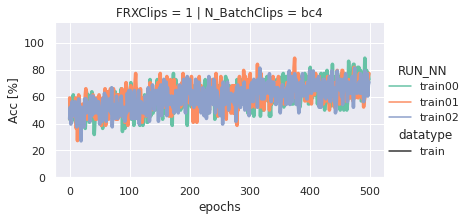

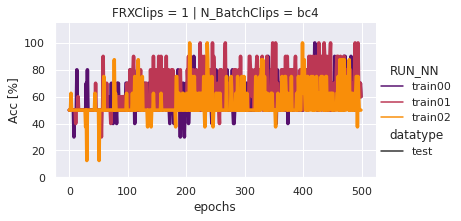

     epochs       LR N_BatchClips FRXClips datatype      Loss   RUN_NN
0         0  lr0.001          bc4        1    train  1.146693  train00
1         1  lr0.001          bc4        1    train  1.306047  train00
2         2  lr0.001          bc4        1    train  0.985652  train00
3         3  lr0.001          bc4        1    train  0.876893  train00
4         4  lr0.001          bc4        1    train  0.865162  train00
..      ...      ...          ...      ...      ...       ...      ...
995     495  lr0.001          bc4        1     test  0.587679  train02
996     496  lr0.001          bc4        1     test  0.864227  train02
997     497  lr0.001          bc4        1     test  1.027110  train02
998     498  lr0.001          bc4        1     test  0.691548  train02
999     499  lr0.001          bc4        1     test  0.908766  train02

[3000 rows x 7 columns]


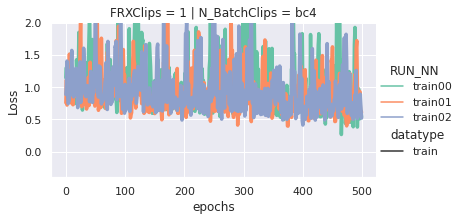

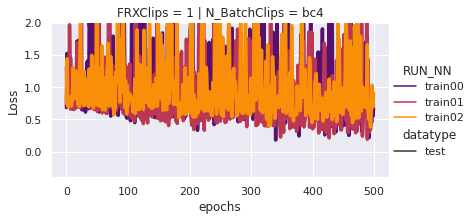

In [4]:
TYPE_str = 'ACC'    
STR_VARIABLE_NAME = 'Acc [%]'
# RUN_VERSION=['run02', 'run00', 'run01']

acc0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
acc1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
acc2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])


acc_dfall = [acc0_all_, acc1_all_,acc2_all_]
acc_all = pd.concat(acc_dfall)
print(acc_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g0=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=acc_all.query("datatype == 'train'"))#data=acc_all)
g0.set(ylim=(0, 115))

sns.set(style="darkgrid")
g1=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=acc_all.query("datatype == 'test'"))#data=acc_all)
g1.set(ylim=(0, 115))


g0.savefig(PLOTTING_RESULTS_PATH+'ACC_train.png', dpi=DPI_val)
g1.savefig(PLOTTING_RESULTS_PATH+'ACC_test.png', dpi=DPI_val)
plt.show()


TYPE_str = 'LOS'    
STR_VARIABLE_NAME = 'Loss'
loss0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
loss1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
loss2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])

loss_dfall = [loss0_all_, loss1_all_,loss2_all_]
loss_all = pd.concat(loss_dfall)
print(loss_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g2=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=loss_all.query("datatype == 'train'"))#data=acc_all)
g2.set(ylim=(-0.4, 2))

sns.set(style="darkgrid")
g3=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=loss_all.query("datatype == 'test'"))#data=acc_all)
g3.set(ylim=(-0.4, 2))

g2.savefig(PLOTTING_RESULTS_PATH+'LOSS_train.png', dpi=DPI_val)
g3.savefig(PLOTTING_RESULTS_PATH+'LOSS_test.png', dpi=DPI_val)

plt.show()


    

## 3. Plotting Paramters of Performance

elapsed_time_for_the_NOTEBOOK_in_secs [172.85471081733704, 174.19665718078613, 179.87559986114502]
elapsed_time_for_the_training_loop_in_secs [113.91451001167297, 115.56843113899231, 121.76731252670288]
Precision [0.8499999999999991, 0.8499999999999991, 0.799999999999999]
Recall [0.785714285714285, 0.785714285714285, 0.6666666666666661]
F1score [0.775401069518716, 0.775401069518716, 0.624999999999999]
       Dataset Classification type  Classification [%]   RUN_NN
0  05-subjects           Precision            0.850000  train00
1  05-subjects           Precision            0.850000  train01
2  05-subjects           Precision            0.800000  train02
0  05-subjects              Recall            0.785714  train00
1  05-subjects              Recall            0.785714  train01
2  05-subjects              Recall            0.666667  train02
0  05-subjects             F1score            0.775401  train00
1  05-subjects             F1score            0.775401  train01
2  05-subjects     

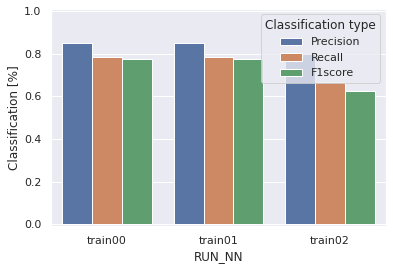

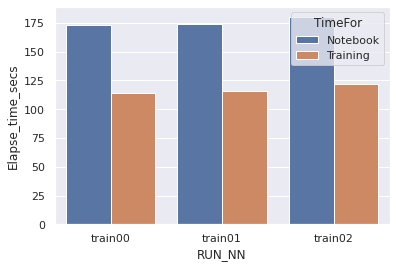

In [5]:
elapsed_time_for_the_NOTEBOOK_in_secs=[]
elapsed_time_for_the_training_loop_in_secs=[]
Precision=[]
Recall=[]
F1score=[]


for i in range(0, len(json_files_params)):
    params=jsonPARAMS2DataFrame(TRAINING_CURVES_PATH,str(json_files_params[i]))
    elapsed_time_for_the_NOTEBOOK_in_secs.append(params[0])
    elapsed_time_for_the_training_loop_in_secs.append(params[1])
    Precision.append(params[11]['Precision']['weighted avg/Total'])
    Recall.append(params[11]['Recall']['weighted avg/Total'])
    F1score.append(params[11]['F1-score']['weighted avg/Total'])
    
print(f'elapsed_time_for_the_NOTEBOOK_in_secs {elapsed_time_for_the_NOTEBOOK_in_secs}')    
print(f'elapsed_time_for_the_training_loop_in_secs {elapsed_time_for_the_training_loop_in_secs}')
print(f'Precision {Precision}')   
print(f'Recall {Recall}')   
print(f'F1score {F1score}')


##
Y_AXIS_LABEL='Classification [%]'
precision_report_df = pd.DataFrame(Precision).reset_index(drop=True)
precision_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
precision_report_df.insert(0, 'Classification type', 'Precision', True)
precision_report_df['RUN_NN'] = RUN_VERSION
precision_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

recall_report_df = pd.DataFrame(Recall).reset_index(drop=True)
recall_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
recall_report_df.insert(0, 'Classification type', 'Recall', True)
recall_report_df['RUN_NN'] = RUN_VERSION
recall_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)


f1score_report_df = pd.DataFrame(F1score).reset_index(drop=True)
f1score_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
f1score_report_df.insert(0, 'Classification type', 'F1score', True)
f1score_report_df['RUN_NN'] = RUN_VERSION
f1score_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

classification_df = pd.concat([precision_report_df, recall_report_df, f1score_report_df])
print(classification_df)
g4=sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="Classification type", 
                 data=classification_df)
g4.set(ylim=(-0.01, 1.01))

plt.savefig(PLOTTING_RESULTS_PATH+'df_classification.png', dpi=DPI_val)

plt.show()

Y_AXIS_LABEL='Elapse_time_secs'
timenotebook_df = pd.DataFrame(elapsed_time_for_the_NOTEBOOK_in_secs).reset_index(drop=True)
timenotebook_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timenotebook_df['RUN_NN'] = RUN_VERSION
timenotebook_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timenotebook_df.insert(3, 'TimeFor', 'Notebook', True)

timetraining_df = pd.DataFrame(elapsed_time_for_the_training_loop_in_secs).reset_index(drop=True)
timetraining_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timetraining_df['RUN_NN'] = RUN_VERSION
timetraining_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timetraining_df.insert(3, 'TimeFor', 'Training', True)

df_all = pd.concat([timenotebook_df, timetraining_df])

g5=sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="TimeFor", 
                 data=df_all)


plt.savefig(PLOTTING_RESULTS_PATH+'df_timetraining.png', dpi=DPI_val)

plt.show()


##https://seaborn.pydata.org/generated/seaborn.barplot.html